In [1]:
"""Resnet model for classification of real and fake images."""
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import time
import gc
from PIL import Image
# Timing the script

script_time = time.time()

In [2]:
AUTOTUNE = tflow.data.AUTOTUNE
# Image opening test
# This lets us know that the folders are in optimal condition
# For the first few test runs, we will utilize the One1KsetDraft
# Sanity check for the image opening

try:
    # Using the 10K folder for this case
    try_im = Image.open("T9-140KGray\Fake\Fake1_gray.png")
    print(np.array(try_im).shape)
    print("Image opened successfully")
except:
    print("Image not found")
### Image opening test finished
# Set up the image size, this is the default for ResNet50

IMAGE_SIZE = (256, 256)  # height, width
# Might change to 128

batch_size = 128  # 32 is default recommendation for vision models
# calculate length  of elements in One1ksetDraft

n_samples = 0
for each_folder in os.listdir("T9-140KGray"):
    print("Folder: {}".format(each_folder))
    print(
        "Number of images: {}".format(
            len(os.listdir("T9-140KGray/{}".format(each_folder)))
        )
    )
    n_samples += len(os.listdir("T9-140KGray/{}".format(each_folder)))
# # the ratio for the splits
# train_ratio = 0.7
# val_ratio = 0.3
# Create the dataset
# adjustment for tensorflow 2.0

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(
    "T9-GrayTrain",
    label_mode="binary",
    # validation_split=val_ratio,
    shuffle=True,
    # subset="training",
    seed=417,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,  # Changed from batch_size 32 to none
    # color_mode="grayscale",
)
### Validating Batches ###
# for the train split, this is to validate that
# the batching worked

count = 0
img_gs = []
label_gs = []
for img, label in train_ds.take(-1):
    count += 1
    img_gs.append(img.numpy())
    label_gs.append(label.numpy())

print(f"Number of batches in Gray Train: {count}")
### Validating Batches Complete
### Enhancing reproducibility

train_ds.shuffle(count, reshuffle_each_iteration=False)
del count, img_gs, label_gs
gc.collect()
### Separating the validation set

validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(
    "T9-GrayVal",
    # validation_split=val_ratio,
    shuffle=True,
    # subset="validation",
    seed=417,
    label_mode="binary",
    image_size=IMAGE_SIZE,
    batch_size=batch_size,  # Changed from batch_size 32 to none
    # color_mode="grayscale",
)
# # for the test split
# val_batches = tflow.data.experimental.cardinality(validation_ds)
# test_ds = validation_ds.take((2 * val_batches) // 3)
# val_ds = validation_ds.skip((2 * val_batches) // 3)
# check for classes in the dataset
# class_names = validation_ds.class_names

v_im = []
v_lab = []
for img, label in validation_ds.take(-1):
    v_im.append(img.numpy())
    v_lab.append(label.numpy())

v_lab_broken = np.array([float(label) for batch in v_lab for label in batch])
print(
    "\n",
    f"For Team 9 : \n\
      Validation Set Labels: \n\
        {np.unique(v_lab_broken, return_counts=True)} \n\
      Class names are: {validation_ds.class_names}",
)

v_lab_string = np.unique(v_lab_broken, return_counts=True)
v_lab_class = validation_ds.class_names
del v_im, v_lab, v_lab_broken
gc.collect()
# check for classes in the test_ds dataset
# class_names = validation_ds.class_names
# test dataset

test_ds = tflow.keras.preprocessing.image_dataset_from_directory(
    "T9-GrayTest",
    label_mode="binary",
    shuffle=True,
    seed=417,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,  # Changed from batch_size 32 to none
    # color_mode="grayscale",
)
# check for classes in the dataset

t_im = []
t_lab = []
for img, label in test_ds.take(-1):
    t_im.append(img.numpy())
    t_lab.append(label.numpy())

t_lab_broken = np.array([float(label) for batch in t_lab for label in batch])
print(
    "\n",
    f"For Team 9: \n\
      Test Set Labels: \n\
        {np.unique(t_lab_broken, return_counts=True)} \n\
        Class names are: {test_ds.class_names}",
)

test_string = np.unique(t_lab_broken, return_counts=True)
test_classes = test_ds.class_names
del t_im, t_lab, t_lab_broken
gc.collect()
# check for classes in the train_ds dataset
# class_names = validation_ds.class_names

tr_im = []
tr_lab = []
for img, label in train_ds.take(-1):
    tr_im.append(img.numpy())
    tr_lab.append(label.numpy())

tr_lab_broken = np.array([float(label) for batch in tr_lab for label in batch])
print(
    "\n",
    f"For Team 9: \n\
      Train Set Labels: \n\
        {np.unique(tr_lab_broken, return_counts=True)} \n\
        Class names are: {train_ds.class_names}",
)

train_string = np.unique(tr_lab_broken, return_counts=True)
train_classes = train_ds.class_names
del tr_im, tr_lab, tr_lab_broken
gc.collect()

(256, 256, 3)
Image opened successfully
Folder: Fake
Number of images: 69997
Folder: Real
Number of images: 69999
Found 100796 files belonging to 2 classes.
Number of batches in Gray Train: 788
Found 11200 files belonging to 2 classes.

 For Team 9 : 
      Validation Set Labels: 
        (array([0., 1.]), array([5600, 5600], dtype=int64)) 
      Class names are: ['Fake', 'Real']
Found 28000 files belonging to 2 classes.

 For Team 9: 
      Test Set Labels: 
        (array([0., 1.]), array([14000, 14000], dtype=int64)) 
        Class names are: ['Fake', 'Real']

 For Team 9: 
      Train Set Labels: 
        (array([0., 1.]), array([50397, 50399], dtype=int64)) 
        Class names are: ['Fake', 'Real']


0

In [3]:
print("Num GPUs Available: ", len(tflow.config.list_physical_devices("GPU")))
print(tflow.config.list_physical_devices("GPU"))
print("Num CPUs Available: ", len(tflow.config.list_physical_devices("CPU")))
print(tflow.config.list_physical_devices("CPU"))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num CPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
epochs = 10

In [5]:
demo_resnet_model = Sequential()
IMAGE_SIZE_INT = 256
IMAGE_SIZE = (256, 256)  # height, width
pretrained_model_for_demo = tflow.keras.applications.ResNet50(
    include_top=False,
    input_shape=(IMAGE_SIZE_INT, IMAGE_SIZE_INT, 3),
    pooling="avg",
    weights="imagenet",
)

In [6]:
for each_layer in pretrained_model_for_demo.layers:
    each_layer.trainable = False

demo_resnet_model.add(pretrained_model_for_demo)
demo_resnet_model.add(Flatten())
demo_resnet_model.add(Dense(512, activation="relu"))
demo_resnet_model.add(Dense(1, activation="sigmoid"))

In [7]:
demo_resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        "AUC",
        "Precision",
        "Recall",
        "TruePositives",
        "TrueNegatives",
        "FalsePositives",
        "FalseNegatives",
    ],
)

In [8]:
history = demo_resnet_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    verbose=1,
    shuffle=False,  # For reproducibility
    # callbacks=[tflow.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)],
)

Epoch 1/10
788/788 [==============================] - 272s 336ms/step - loss: 0.3524 - accuracy: 0.8452 - auc: 0.9243 - precision: 0.8552 - recall: 0.8311 - true_positives: 41889.0000 - true_negatives: 43303.0000 - false_positives: 7094.0000 - false_negatives: 8510.0000 - val_loss: 0.2780 - val_accuracy: 0.8823 - val_auc: 0.9652 - val_precision: 0.8370 - val_recall: 0.9496 - val_true_positives: 5318.0000 - val_true_negatives: 4564.0000 - val_false_positives: 1036.0000 - val_false_negatives: 282.0000
Epoch 2/10
788/788 [==============================] - 268s 340ms/step - loss: 0.2342 - accuracy: 0.9028 - auc: 0.9664 - precision: 0.9094 - recall: 0.8947 - true_positives: 45090.0000 - true_negatives: 45906.0000 - false_positives: 4491.0000 - false_negatives: 5309.0000 - val_loss: 0.2218 - val_accuracy: 0.9079 - val_auc: 0.9736 - val_precision: 0.9493 - val_recall: 0.8620 - val_true_positives: 4827.0000 - val_true_negatives: 5342.0000 - val_false_positives: 258.0000 - val_false_negatives: 

In [9]:
model_val_tr_results = history.history

In [10]:
with open("model_grayval_tr_results.txt", "w") as file:
    file.write(str(model_val_tr_results))

In [11]:
final_hp = demo_resnet_model.get_config()
with open("final_gray_hp.txt", "w") as file:
    file.write(str(final_hp))

demo_resnet_model.save("demo_resnet_model_140KGray.h5")
demo_resnet_model.save_weights("demo_resnet_model_weights_140KGray.h5")

In [12]:
imgs_arr_val = []
labels_arr_val = []
pred_arr_val = []
combined_val = []
for img, label in validation_ds.take(-1):
    imgs_arr_val.append(img.numpy())
    labels_arr_val.append(label.numpy())
    pred_val = demo_resnet_model.predict(img)
    pred_arr_val.append(pred_val)
    combined_val.append((img.numpy(), label.numpy(), pred_val))

val_label_final = np.array([])
val_pred_final = np.array([])
val_counter = 0
for im_val, label_val, pred_val in combined_val:
    val_label_final = np.append(val_label_final, label_val)
    val_pred_final = np.append(val_pred_final, pred_val)
    # Sanity checking the misclassifications
    misclassifieds = label_val - np.round((pred_val))
    val_counter += np.sum((abs(misclassifieds)))

print(f"Number of misclassified images in the validation set: {val_counter}")

2/2 [==============================] - 0s 80ms/step
Number of misclassified images in the validation set: 808.0


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
tflow.data.datasets.from_tensor_slices(validation_ds)
fpr, tpr, thresholds = roc_curve(val_label_final, val_pred_final)
roc_auc = auc(fpr, tpr)

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'datasets'

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [15]:
fpr, tpr, thresholds = roc_curve(val_label_final, val_pred_final)

In [16]:
roc_auc = auc(fpr, tpr)

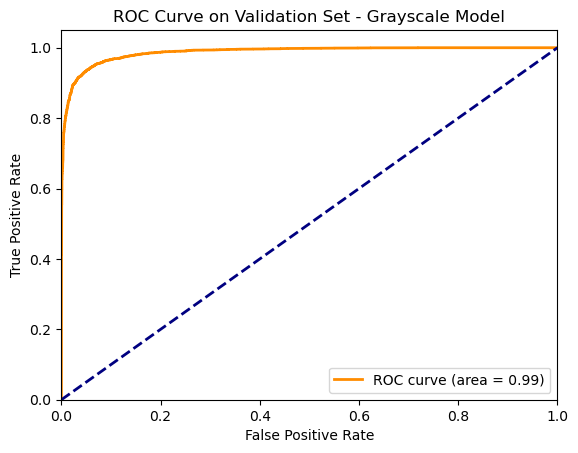

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure()
lw = 2
plt.plot(
    fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set - Grayscale Model")
plt.legend(loc="lower right")
# save the ROC curve

plt.show()
plt.savefig("ROC_curve.png")

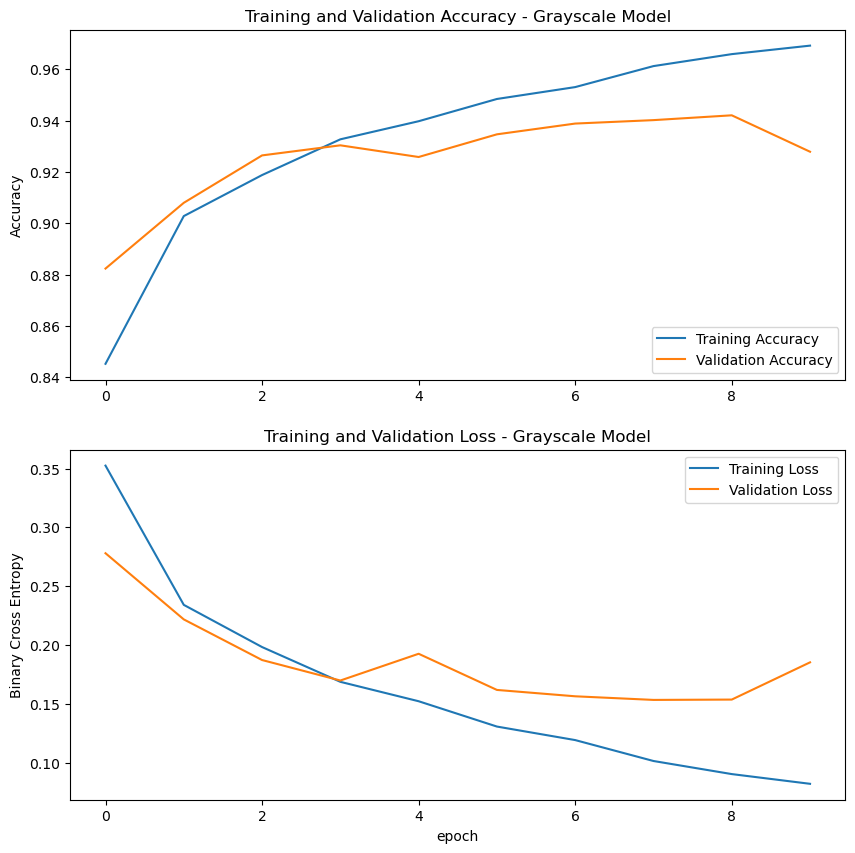

In [18]:
plotter_lib.figure(figsize=(10, 10))
plotter_lib.subplot(2, 1, 1)
plotter_lib.plot(history.history["accuracy"], label="Training Accuracy")
plotter_lib.plot(history.history["val_accuracy"], label="Validation Accuracy")
plotter_lib.legend(loc="lower right")
plotter_lib.ylabel("Accuracy")
plotter_lib.title("Training and Validation Accuracy - Grayscale Model")
plotter_lib.subplot(2, 1, 2)
plotter_lib.plot(history.history["loss"], label="Training Loss")
plotter_lib.plot(history.history["val_loss"], label="Validation Loss")
plotter_lib.legend(loc="upper right")
plotter_lib.ylabel("Binary Cross Entropy")
plotter_lib.title("Training and Validation Loss - Grayscale Model")
plotter_lib.xlabel("epoch")
plotter_lib.show()

In [19]:
from sklearn.metrics import classification_report
cs_report_val = classification_report(val_label_final, val_pred_final.round())
print(cs_report_val)
# Training on the entire dataset

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.92      5600
         1.0       0.90      0.97      0.93      5600

    accuracy                           0.93     11200
   macro avg       0.93      0.93      0.93     11200
weighted avg       0.93      0.93      0.93     11200

